In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv("Unemployment.csv")

In [3]:
df.head(7)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural


In [4]:
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [8]:
#change the datatype of Date column
df[' Date'] = pd.to_datetime(df[' Date'])
df.dtypes

/tmp/ipykernel_736/3356721990.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[' Date'] = pd.to_datetime(df[' Date'])


Region                                              object
 Date                                       datetime64[ns]
 Frequency                                          object
 Estimated Unemployment Rate (%)                   float64
 Estimated Employed                                float64
 Estimated Labour Participation Rate (%)           float64
Area                                                object
dtype: object

In [9]:
#check missing values
print(df.isna().sum())

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [10]:
#check duplicate rows
df.duplicated()[df.duplicated()==True]

360    True
361    True
362    True
363    True
364    True
365    True
366    True
367    True
368    True
369    True
370    True
371    True
372    True
754    True
755    True
756    True
757    True
758    True
759    True
760    True
761    True
762    True
763    True
764    True
765    True
766    True
767    True
dtype: bool

In [11]:
#number of rows and columns
print("shape (rows,columns):", df.shape)

shape (rows,columns): (768, 7)


In [12]:
# Statistical summary
df.describe(include='all')

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740,740,740,740.000000,7.400000e+02,740.000000,740
unique,28,NaN,2,NaN,NaN,NaN,2
top,Andhra Pradesh,NaN,Monthly,NaN,NaN,NaN,Urban
freq,28,NaN,381,NaN,NaN,NaN,381
mean,NaN,2019-12-12 18:36:58.378378496,NaN,11.787946,7.204460e+06,42.630122,NaN
min,NaN,2019-05-31 00:00:00,NaN,0.000000,4.942000e+04,13.330000,NaN
25%,NaN,2019-08-31 00:00:00,NaN,4.657500,1.190404e+06,38.062500,NaN
50%,NaN,2019-11-30 00:00:00,NaN,8.350000,4.744178e+06,41.160000,NaN
75%,NaN,2020-03-31 00:00:00,NaN,15.887500,1.127549e+07,45.505000,NaN
max,NaN,2020-06-30 00:00:00,NaN,76.740000,4.577751e+07,72.570000,NaN


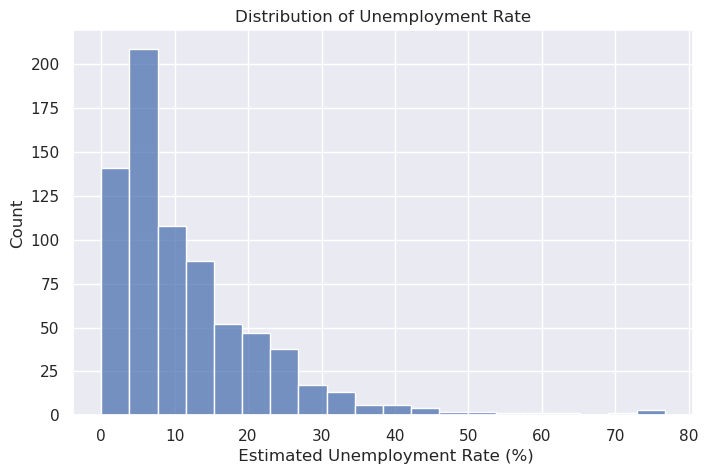

In [16]:
#Univariate Analysis
plt.figure(figsize=(8,5))
sns.histplot(df[' Estimated Unemployment Rate (%)'], bins=20)
plt.title("Distribution of Unemployment Rate")
plt.show()

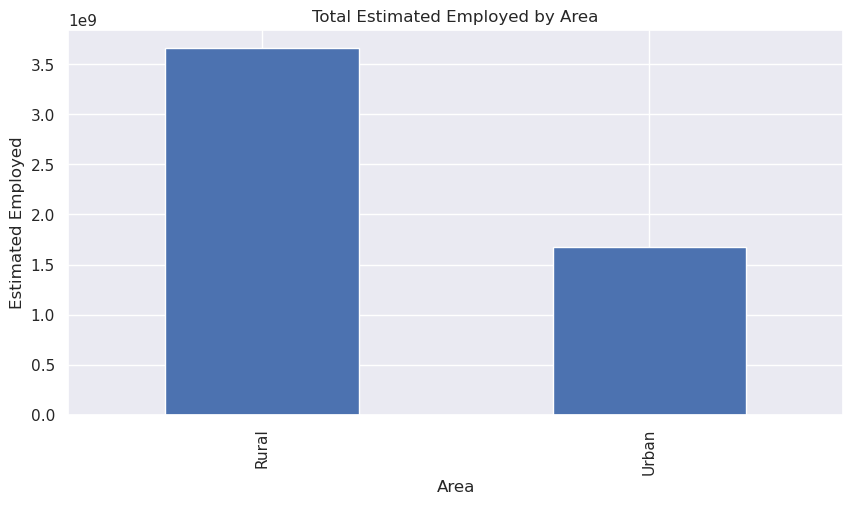

Area
Rural    3.659234e+09
Urban    1.672066e+09
Name:  Estimated Employed, dtype: float64

In [17]:
#Bivariate Analysis
area_employed = df.groupby('Area')[' Estimated Employed'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
area_employed.plot(kind='bar')
plt.title("Total Estimated Employed by Area")
plt.ylabel("Estimated Employed")
plt.show()

area_employed

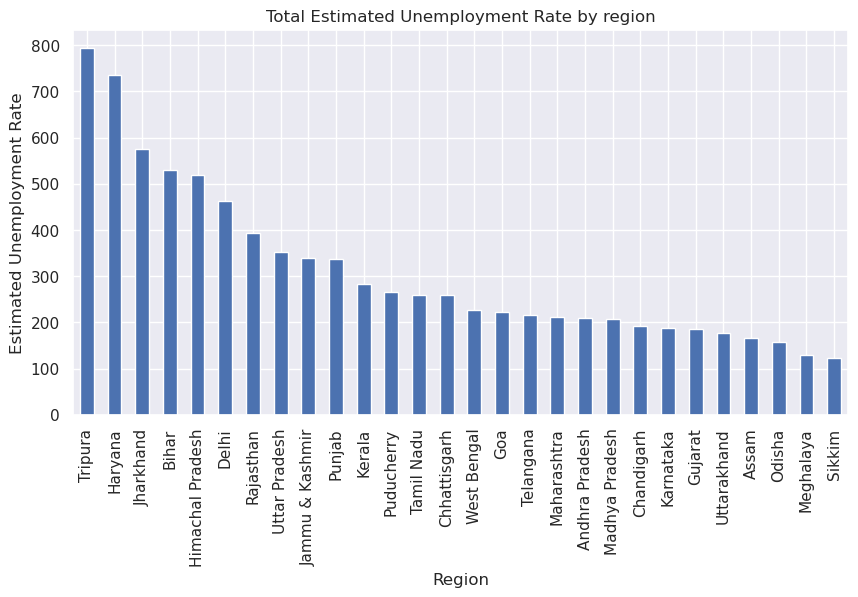

Region
Tripura             793.81
Haryana             735.93
Jharkhand           576.38
Bihar               529.71
Himachal Pradesh    519.13
Delhi               461.87
Rajasthan           393.63
Uttar Pradesh       351.44
Jammu & Kashmir     339.96
Punjab              336.87
Kerala              283.47
Puducherry          265.59
Tamil Nadu          259.96
Chhattisgarh        258.73
West Bengal         227.49
Goa                 222.58
Telangana           216.66
Maharashtra         211.61
Andhra Pradesh      209.36
Madhya Pradesh      207.38
Chandigarh          191.90
Karnataka           186.93
Gujarat             186.59
Uttarakhand         177.74
Assam               167.13
Odisha              158.42
Meghalaya           129.57
Sikkim              123.24
Name:  Estimated Unemployment Rate (%), dtype: float64

In [22]:
#Bivariate Analysis
region_unemployed = df.groupby('Region')[' Estimated Unemployment Rate (%)'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
region_unemployed.plot(kind='bar')
plt.title("Total Estimated Unemployment Rate by region")
plt.ylabel("Estimated Unemployment Rate")
plt.show()

region_unemployed

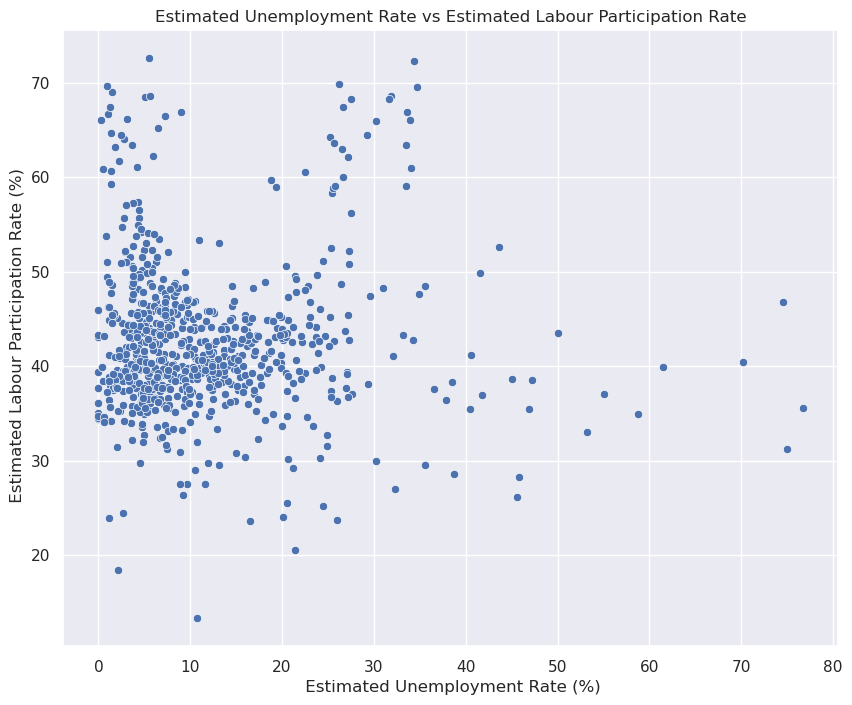

In [33]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=' Estimated Unemployment Rate (%)' , y=' Estimated Labour Participation Rate (%)', data=df)
plt.title("Estimated Unemployment Rate vs Estimated Labour Participation Rate")
plt.show()

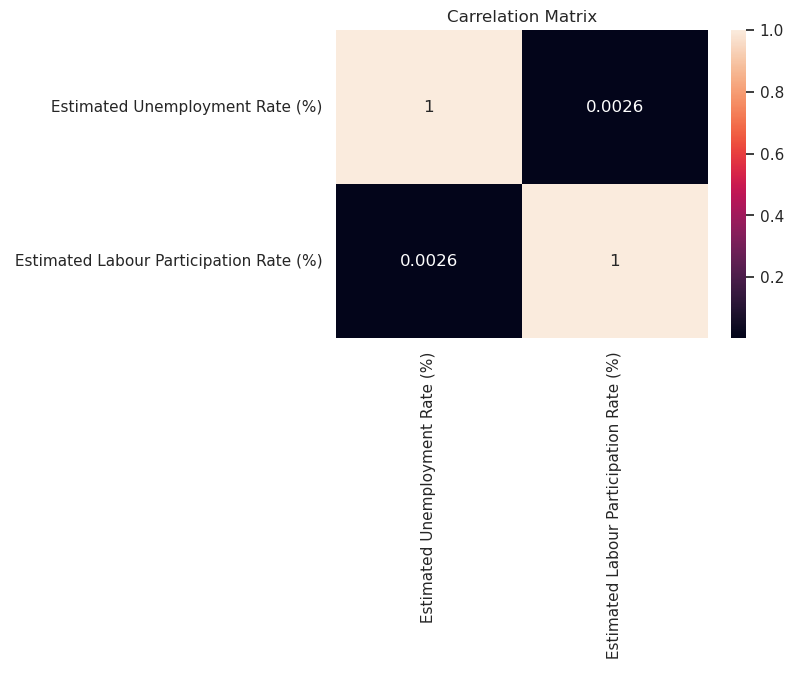

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(df[[' Estimated Unemployment Rate (%)',' Estimated Labour Participation Rate (%)']].corr(),annot=True)
plt.title("Carrelation Matrix")
plt.show()

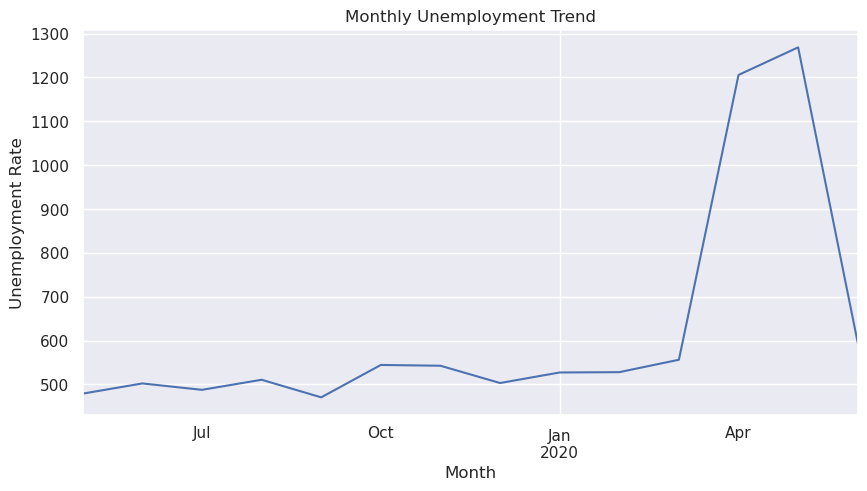

In [38]:
df['Month'] = df[' Date'].dt.to_period('M')

monthly_unemployed = df.groupby('Month')[' Estimated Unemployment Rate (%)'].sum()

plt.figure(figsize=(10,5))
monthly_unemployed.plot()
plt.title("Monthly Unemployment Trend")
plt.ylabel("Unemployment Rate")
plt.show()